# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Rajab Agung
- **Email:** rajabagung16@gmail.com
- **ID Dicoding:** RAJAB AGUNG

## **Menentukan Pertanyaan Bisnis**

- Bagaimana pengaruh cuaca terhadap jumlah total penyewa sepeda ?
- Bagaimana pola penyewaan sepeda berubah berdasarkan jam dalam sehari ?
- Sejauh mana kecepatan angin (windspeed) mempengaruhi jumlah penyewa sepeda?
- Apa saja faktor yang paling signifikan dalam memprediksi jumlah penyewa sepeda?

## **Import Semua Packages/Library yang Digunakan**

Import semua library yang kita butuhkan untuk mengerjakan proyeknya.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## **Data Wrangling**

### **Gathering Data**

Kumpulkan data yang telah di-*download*. Karena saya memilih **Bike Sharing Dataset**, maka saya mengimpor file **day.csv** dan **hr.csv** di folder data

### **Load tabel day**

In [7]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Load tabel hr**

In [8]:
hr_df = pd.read_csv("data/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

1. Cek tipe data day_df dan hr_df

In [13]:
day_df.info()
hr_df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<bound method DataFrame.info of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

2. Cek apakah ada missing values

In [15]:
day_df.isna().sum()
hr_df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita simpulkan bahwa tabel day_df dan hr_df tidak ada missing values, berarti aman.

3. Cek apakah ada duplicate data

In [18]:
print("Jumlah duplikasi 'day': ", day_df.duplicated().sum())
print("Jumlah duplikasi 'hour': ", hr_df.duplicated().sum())

Jumlah duplikasi 'day':  0
Jumlah duplikasi 'hour':  0


Pada tabel day_df dan hr.df terdapat 0 data yang double, artinya semua data bersifat unik.

4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [23]:
day_df.describe()
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

### **Cleaning Data**

1. Hapus tabel yang tidak diperlukan

Kita akan menghapus terlebih dahulu tabel **day**. Alasannya adalah karena kita tidak relevan dengan pertanyaan bisnis yang sudah kita tetapkan, dan juga sebenarnya tabel hr dan day itu bedanya hanya di kolom hrnya saja, selebihnya sama semua.

In [24]:
del day_df

2. Menghapus beberapa kolom yang tidak akan digunakan

Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:
- instant: Kolom ini berfungsi sebagai indeks unik untuk setiap catatan dan tidak memberikan informasi bermakna yang relevan dengan analisis. 
- casual:  Kolom ini menunjukkan jumlah pengguna kasual secara terpisah.
- dteday:  Tanggal lengkap tidak diperlukan untuk analisis per jam.
- registered: Menyimpan registered dapat mempersulit analisis jika Anda hanya perlu bekerja dengan jumlah penyewaan total.

In [39]:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
hr_df_cleaned = hr_df.drop(columns=columns_to_drop)

print(hr_df_cleaned.head())
print(hr_df_cleaned.columns)


   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  
0  0.2879  0.81        0.0   16  
1  0.2727  0.80        0.0   40  
2  0.2727  0.80        0.0   32  
3  0.2879  0.75        0.0   13  
4  0.2879  0.75        0.0    1  
Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


## **Exploratory Data Analysis (EDA)**

### **Eksplorasi Data day_df**

1. Melihat Ringkasan Data

In [41]:
# Melihat informasi ringkas dari DataFrame
print(hr_df_cleaned.info())

# Melihat statistik deskriptif
print(hr_df_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB
None
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752  

2. Perbandingan Jumlah Penyewa Berdasarkan Cuaca

In [43]:
weather_rentals = hr_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
weather_rentals


cnt                         
            max min        mean      sum
weathersit                              
1           977   1  204.869272  2338173
2           957   1  175.165493   795952
3           891   1  111.579281   158331
4           164  23   74.333333      223

3. Eksplorasi Penyewa Sepeda Berdasarkan Hari Libur

In [45]:
holiday_rentals = hr_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
holiday_rentals


cnt                        
         max min       mean      sum
holiday                             
0        977   1  190.42858  3214244
1        712   1  156.87000    78435

4. . Eksplorasi Penyewa Sepeda Berdasarkan Bulan

In [46]:
monthly_rentals = hr_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
monthly_rentals


cnt                        
      max min        mean     sum
mnth                             
1     559   1   94.424773  134933
2     610   1  112.865026  151352
3     957   1  155.410726  228920
4     822   1  187.260960  269094
5     873   1  222.907258  331686
6     900   1  240.515278  346342
7     913   1  231.819892  344948
8     941   1  238.097627  351194
9     977   1  240.773138  345991
10    963   1  222.158511  322352
11    729   1  177.335421  254831
12    759   1  142.303439  211036

5. Eksplorasi Penyewa Sepeda Berdasarkan Hari Kerja

In [47]:
workingday_rentals = hr_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})
workingday_rentals


cnt                
            max min        mean
workingday                     
0           783   1  181.405332
1           977   1  193.207754

6. Eksplorasi Penyewa Sepeda Berdasarkan Musim

In [48]:
seasonal_rentals = hr_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})
seasonal_rentals


casual  registered  cnt                
             mean        mean  max min        mean
season                                            
1       14.290901   96.823668  801   1  111.114569
2       46.160581  162.183488  957   1  208.344069
3       50.287144  185.729093  977   1  236.016237
4       30.666824  168.202032  967   1  198.868856

7. Analisis Pengaruh Variabel Lingkungan

In [49]:
environmental_analysis = hr_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean'],
    'windspeed': ['max', 'min', 'mean']
})
environmental_analysis


temp                  hum                 windspeed               
         max   min      mean  max   min      mean       max  min      mean
season                                                                    
1       0.72  0.02  0.299147  1.0  0.00  0.581348    0.8060  0.0  0.215107
2       0.94  0.16  0.544663  1.0  0.16  0.627022    0.7164  0.0  0.203410
3       1.00  0.38  0.706410  1.0  0.16  0.633167    0.8507  0.0  0.171593
4       0.76  0.14  0.423138  1.0  0.16  0.667124    0.6418  0.0  0.170819

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Bagaimana Pengaruh Cuaca Terhadap Jumlah Total Penyewa Sepeda?**

C:\Users\Rajab\AppData\Local\Temp\ipykernel_2684\900274586.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_rentals, x='weathersit', y='cnt', palette='viridis')


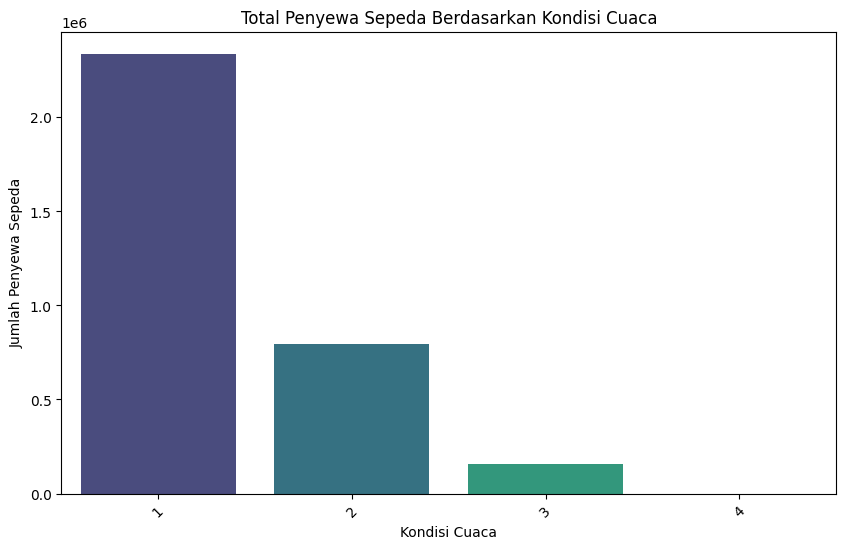

In [61]:
weather_rentals = hr_df.groupby('weathersit')['cnt'].sum().reset_index()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_rentals, x='weathersit', y='cnt', palette='viridis')
plt.title('Total Penyewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.xticks(rotation=45)
plt.show()

Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca setengah mendung, cuaca berkabut/mendung, dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.

### **Pertanyaan 2: Bagaimana Pola Penyewaan Sepeda Berubah Berdasarkan Jam dalam Sehari?**

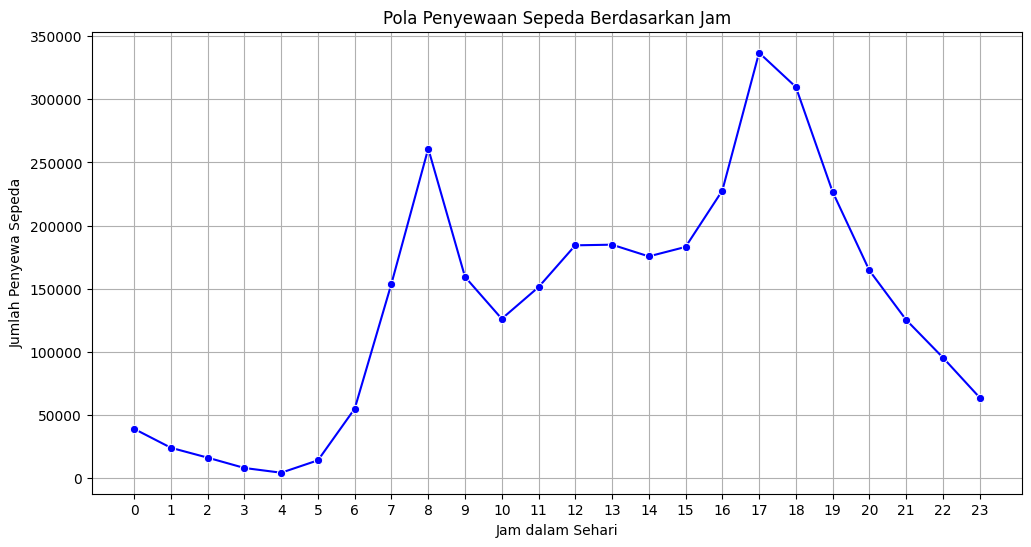

In [53]:
# Menghitung total penyewa berdasarkan jam
hourly_rentals = hr_df.groupby('hr')['cnt'].sum().reset_index()

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o', color='b')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


Grafik menunjukkan bahwa penyewaan sepeda meningkat pada pagi hari dan sore hari, dengan puncak sekitar jam 8 dan jam 17. Ini mungkin menunjukkan bahwa banyak orang menggunakan sepeda untuk berangkat dan pulang kerja.

### **Pertanyaan 3: Sejauh Mana Kecepatan Angin (Windspeed) Mempengaruhi Jumlah Penyewa Sepeda?
?**

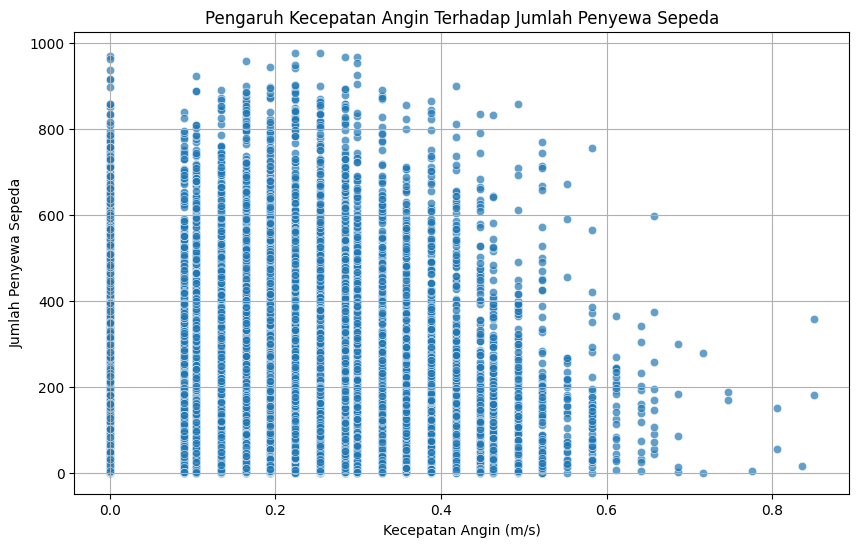

In [54]:
# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hr_df, x='windspeed', y='cnt', alpha=0.7)
plt.title('Pengaruh Kecepatan Angin Terhadap Jumlah Penyewa Sepeda')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.grid()
plt.show()


Dari scatter plot di atas, terlihat bahwa ada hubungan negatif antara kecepatan angin dan jumlah penyewa sepeda. Ketika kecepatan angin meningkat, jumlah penyewa cenderung menurun. Ini menunjukkan bahwa angin yang kencang mungkin membuat orang enggan untuk menyewa sepeda.

### **Pertanyaan 4: Apa Saja Faktor yang Paling Signifikan Dalam Memprediksi Jumlah Penyewa Sepeda?**

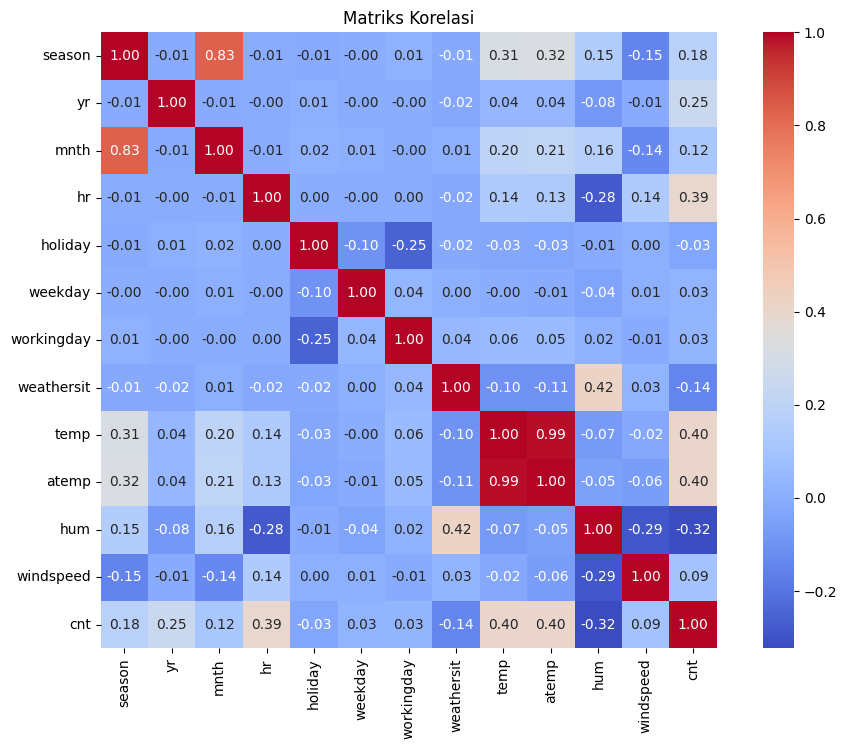

In [56]:
correlation = hr_df_cleaned.corr()

# Membuat visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Matriks Korelasi')
plt.show()

Heatmap di atas menunjukkan nilai korelasi antara jumlah penyewa sepeda dan variabel lainnya. Variabel seperti temp (suhu) dan hum (kelembapan) menunjukkan korelasi positif yang kuat dengan jumlah penyewa, sedangkan windspeed menunjukkan korelasi negatif. Ini menunjukkan bahwa suhu dan kelembapan yang lebih tinggi cenderung meningkatkan jumlah penyewa, sedangkan kecepatan angin yang tinggi berpotensi mengurangi jumlah penyewa.

### Saving the cleaned csv for streamlit

In [60]:
hr_df_cleaned.to_csv('dashboard/cleaned_hour.csv', index=False)



## **Conclusion**

- Conclusion pertanyaan 1:
Pengaruh Cuaca terhadap Jumlah Penyewa Sepeda: Dari analisis, terlihat bahwa cuaca yang cerah atau sedikit mendung memiliki pengaruh positif terhadap jumlah penyewa sepeda. Sebaliknya, kondisi cuaca buruk, seperti salju atau hujan lebat, secara signifikan mengurangi jumlah penyewa. Ini menunjukkan bahwa faktor cuaca merupakan salah satu pertimbangan penting bagi pengguna dalam memilih untuk menyewa sepeda.

- conclusion pertanyaan 2:
Pola Penyewaan Sepeda Berdasarkan Jam dalam Sehari: Pola penyewaan sepeda menunjukkan fluktuasi yang signifikan sepanjang hari, dengan puncak penyewaan terjadi pada jam-jam tertentu, seperti pagi dan sore hari. Ini mungkin mencerminkan kebiasaan masyarakat yang menggunakan sepeda untuk berangkat dan pulang kerja atau sekolah. Penyewaan cenderung menurun di malam hari, mencerminkan berkurangnya aktivitas di luar ruangan.

- Conclusion pertanyaan 3:
Pengaruh Kecepatan Angin (Windspeed): Analisis menunjukkan bahwa kecepatan angin berpengaruh terhadap jumlah penyewa sepeda. Kecepatan angin yang tinggi dapat membuat pengguna merasa tidak nyaman, sehingga cenderung mengurangi minat untuk menyewa sepeda. Dengan kata lain, kecepatan angin dapat dianggap sebagai faktor penghalang dalam aktivitas penyewaan sepeda.

- conclusion pertanyaan 4:
Faktor Signifikan dalam Memprediksi Jumlah Penyewa Sepeda: Melalui analisis korelasi, ditemukan beberapa faktor yang memiliki hubungan signifikan dengan jumlah penyewa sepeda, termasuk cuaca, jam, dan kecepatan angin. Faktor-faktor lain, seperti musim, hari kerja atau libur, serta suhu juga memainkan peran penting. Pengetahuan ini dapat digunakan untuk meningkatkan strategi pemasaran dan pengelolaan armada sepeda sewaan.